In [93]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

%matplotlib inline

In [7]:
features_dir = Path.cwd().parent / "data" / "features"

train_sj = pd.read_csv(features_dir / "sj_train_lag_features.csv")
train_iq = pd.read_csv(features_dir / "iq_train_lag_features.csv")
test_sj = pd.read_csv(features_dir / "sj_test_lag_features.csv")
test_iq = pd.read_csv(features_dir / "iq_test_lag_features.csv")

In [8]:
train_sj.head()

,var1(t-51),var2(t-51),var3(t-51),var4(t-51),var5(t-51),var6(t-51),var7(t-51),var8(t-51),var9(t-51),var10(t-51),...,var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),total_cases
0,0.0,-1.081814,-1.183554,-0.759571,-1.272727,-0.545493,-1.008038,-1.077631,-0.947159,-1.092417,...,-0.332775,-0.491058,-0.551603,-0.292531,-0.371501,-0.513561,-0.487939,-0.520120,-0.316543,16
1,0.0,-0.559956,-0.583693,-0.214395,-0.272727,-0.528609,-0.544774,-0.559237,-0.448256,-0.465126,...,0.006132,-0.014841,-0.542011,0.043284,0.026370,-0.498458,0.000000,-0.500616,-0.314149,17
2,0.0,0.006304,-0.005017,-0.214395,0.000000,-0.503747,0.006414,0.005247,-0.085027,-0.024420,...,-0.149642,-0.019788,-0.525332,-0.122795,-0.047925,-0.485891,0.000000,-0.484519,-0.309349,12
3,0.0,-0.061121,-0.053519,0.110260,0.227273,-0.471035,-0.061864,-0.061176,-0.011965,0.020094,...,-0.312113,-0.025905,-0.500769,-0.292531,-0.124972,-0.466505,0.000000,-0.460816,-0.301709,17
4,0.0,0.144991,0.146063,0.741194,0.500000,-0.430679,0.149107,0.144828,0.357315,0.254905,...,0.039522,-0.009984,-0.467666,0.074299,0.040129,-0.426364,0.000000,-0.429630,-0.290616,10


In [9]:
test_sj.head()

,var1(t-51),var2(t-51),var3(t-51),var4(t-51),var5(t-51),var6(t-51),var7(t-51),var8(t-51),var9(t-51),var10(t-51),...,var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),city,year,weekofyear
0,0.0,-0.005756,0.008362,-0.428790,-0.272727,-0.545493,-0.005851,-0.005468,-0.170237,-0.135515,...,-0.551399,-0.073832,0.088319,-0.509228,0.229765,-0.504038,-0.316543,sj,2009.0,17.0
1,0.0,0.044128,0.036237,0.049005,0.227273,-0.528609,0.045030,0.043283,0.035154,0.085792,...,-0.542384,-0.292531,-0.371501,-0.505322,-0.487939,-0.512080,-0.314149,sj,2009.0,18.0
2,0.0,0.297931,0.284321,0.765697,0.727273,-0.503747,0.309975,0.297578,0.472874,0.443340,...,-0.525707,-0.483404,-0.345179,-0.493886,-0.269139,-0.491195,-0.309349,sj,2009.0,19.0
3,0.0,0.066603,0.065226,0.661562,0.500000,-0.471035,0.068082,0.066136,0.273739,0.204713,...,-0.500090,0.312657,0.144692,-0.452227,0.000000,-0.460816,-0.301709,sj,2009.0,20.0
4,0.0,0.163081,0.157213,0.532925,0.500000,-0.430679,0.167942,0.162594,0.292657,0.266487,...,-0.468455,0.369796,0.548707,-0.418746,0.752791,-0.407973,-0.290616,sj,2009.0,21.0


In [109]:
def generate_model(data, n_units=64):
    lstm = tf.keras.layers.LSTM(n_units)

    inputs = tf.keras.Input(shape=(data.shape[1], data.shape[2]))
    x = lstm(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(n_units)(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs, outputs)
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, 50, 0.9)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    model.compile(optimizer, loss="mae")

    return model

    

In [72]:
X_sj = train_sj.drop(["total_cases"], axis=1)
y_sj = train_sj["total_cases"]
X_train_sj, X_val_sj, y_train_sj, y_val_sj = train_test_split(X_sj.values, y_sj.values, test_size=0.2, shuffle=False)
X_train_sj = X_train_sj.reshape((X_train_sj.shape[0], 1, X_train_sj.shape[1]))
X_val_sj = X_val_sj.reshape((X_val_sj.shape[0], 1, X_val_sj.shape[1]))

In [116]:
model = generate_model(X_train_sj, 256)

In [122]:
num_epochs = 400
batch_size = 128
history = model.fit(
    X_train_sj,
    y_train_sj,
    batch_size,
    num_epochs,
    verbose=2,
    validation_data=(X_val_sj, y_val_sj),
    shuffle=False,
)

 - loss: 14.2686 - val_loss: 18.5557
Epoch 62/400
6/6 - 0s - loss: 14.1811 - val_loss: 18.7759
Epoch 63/400
6/6 - 0s - loss: 14.1855 - val_loss: 19.0401
Epoch 64/400
6/6 - 0s - loss: 14.1241 - val_loss: 19.3945
Epoch 65/400
6/6 - 0s - loss: 13.9727 - val_loss: 19.2127
Epoch 66/400
6/6 - 0s - loss: 13.9060 - val_loss: 18.9834
Epoch 67/400
6/6 - 0s - loss: 13.9234 - val_loss: 18.8209
Epoch 68/400
6/6 - 0s - loss: 14.5778 - val_loss: 18.9089
Epoch 69/400
6/6 - 0s - loss: 13.9999 - val_loss: 19.3107
Epoch 70/400
6/6 - 0s - loss: 14.1271 - val_loss: 18.6983
Epoch 71/400
6/6 - 0s - loss: 14.0269 - val_loss: 19.0594
Epoch 72/400
6/6 - 0s - loss: 13.9782 - val_loss: 19.2643
Epoch 73/400
6/6 - 0s - loss: 14.0699 - val_loss: 19.1572
Epoch 74/400
6/6 - 0s - loss: 14.1525 - val_loss: 19.0928
Epoch 75/400
6/6 - 0s - loss: 13.5910 - val_loss: 19.1186
Epoch 76/400
6/6 - 0s - loss: 14.0513 - val_loss: 19.4598
Epoch 77/400
6/6 - 0s - loss: 13.7640 - val_loss: 19.1801
Epoch 78/400
6/6 - 0s - loss: 13.68

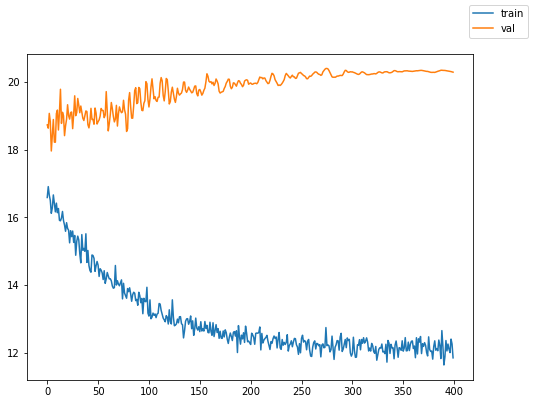

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(history.history["loss"], label="train")
ax.plot(history.history["val_loss"], label="val")
fig.legend()

In [124]:
X_test_sj = test_sj.drop(["city", "year", "weekofyear"], axis=1).values
X_test_sj = X_test_sj.reshape((X_test_sj.shape[0], 1, X_test_sj.shape[1]))

pred_test = model.predict(X_test_sj)

In [125]:
X_train_full_sj = X_sj.values
X_train_full_sj = X_train_full_sj.reshape((X_train_full_sj.shape[0], 1, X_train_full_sj.shape[1]))
pred_train = model.predict(X_train_full_sj)

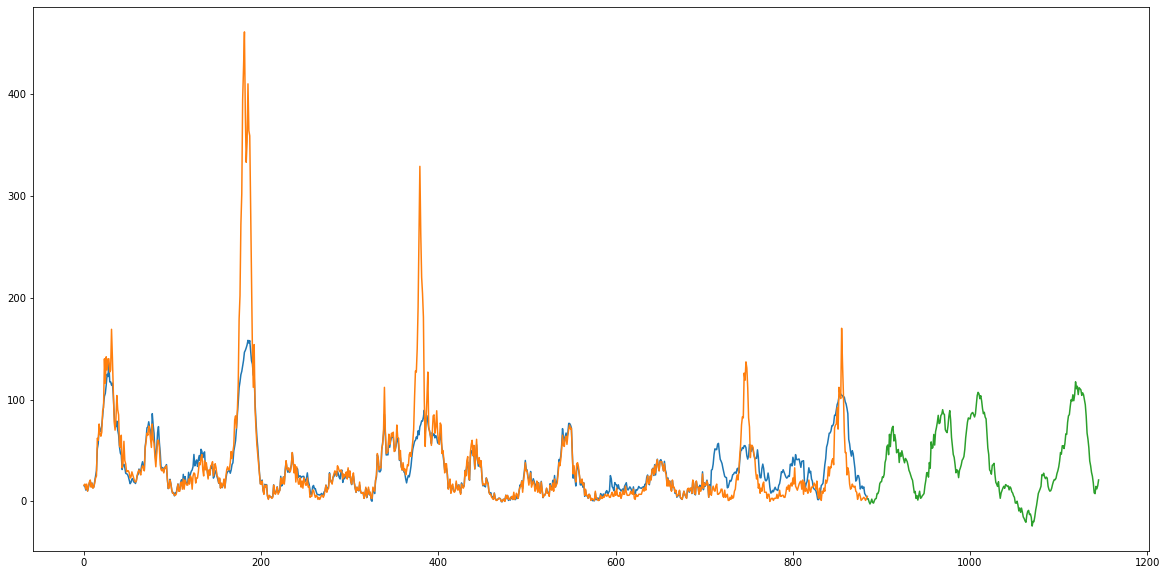

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(np.arange(len(pred_train)), pred_train)
ax.plot(np.arange(len(y_sj)), y_sj.values)
ax.plot(np.arange(len(pred_test)) + len(pred_train), pred_test)